In [1]:
# set env via .env file
#import os
import sys
import pandas as pd
from importlib import reload
import datetime
import munch

import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import shared
import config
import provider_yfinance as provider
import plot

reload(shared)
reload(config)
reload(provider)
reload(plot)

plot.Notebook()

mpl.rcParams['figure.figsize'] = (16, 9)
mpl.rcParams['axes.grid'] = False
mpl.rcParams['axes.unicode_minus']=False
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)


In [2]:
config.print_env()

TF version: 2.1.0
Keras version: 2.2.4-tf
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:CPU:0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Is there a GPU available: False
Is the Tensor on GPU #0: False
Device name: /job:localhost/replica:0/task:0/device:CPU:0
Eager Execution enabled: True


In [3]:
cfg = config.get_config('^GDAXI', True)
config.overwrite_end_dt(cfg, '2020-01-16')
config.save_config(cfg)

config> current directory:/mnt/c/notebooks/sandbox
config> data period: from '2018-02-16' to '2020-01-17'
config> download period: from '2017-12-01' to '2020-01-17'
shared> parsing stocks from web '^GDAXI' ...
config> benchmarks: '['000001.SS', 'AUDUSD=X', 'BTCUSD=X', 'CNY=X', 'ETHUSD=X', 'EURCAD=X', 'EURCHF=X', 'EURGBP=X', 'EURHUF=X', 'EURJPY=X', 'EURJPY=X', 'EURSEK=X', 'EURUSD=X', 'GBPJPY=X', 'GBPUSD=X', 'GC=F', 'HKD=X', 'IDR=X', 'IMOEX.ME', 'INR=X', 'JPY=X', 'KW=F', 'LC=F', 'LH=F', 'MXN=X', 'MYR=X', 'NZDUSD=X', 'PA=F', 'PHP=X', 'PL=F', 'RUB=X', 'S=F', 'SGD=X', 'SI=F', 'SM=F', 'THB=X', 'ZAR=X', '^AORD', '^AXJO', '^BFX', '^BSESN', '^BUK100P', '^BVSP', '^DJI', '^FCHI', '^FTSE', '^GDAXI', '^GSPC', '^GSPTSE', '^HSI', '^IPSA', '^IXIC', '^JKSE', '^JN0U.JO', '^KLSE', '^KS11', '^MERV', '^MXX', '^N100', '^N225', '^NYA', '^NZ50', '^RUT', '^STI', '^STOXX50E', '^TA125.TA', '^TWII', '^VIX', '^XAX']'
config> stocks: '['1COV.DE', 'ADS.DE', 'ALV.DE', 'BAS.DE', 'BAYN.DE', 'BEI.DE', 'BMW.DE', 'CON.DE'

In [4]:
%%time
# total: 17 s

cfg_stocks, data_stocks = provider.load_stocks(cfg, compact=True)

CPU times: user 125 ms, sys: 46.9 ms, total: 172 ms
Wall time: 168 ms


In [5]:
%%time
# total (download): 1h
# total (cached): 25 s

cfg_benchmarks, data_benchmarks = provider.load_benchmarks(cfg)

shared> failed to load pickle file: '/mnt/c/notebooks/sandbox/cache/20200116/benchmarks_1d.pkl'
shared> failed to load pickle file: '/mnt/c/notebooks/sandbox/cache/20200116/benchmarks_1d_meta.pkl'
tickers-benchmarks> downloading histories ...
[*********************100%***********************]  68 of 68 completed
WARN: tickers-benchmarks> #missing: 166640
ticker-000001.SS> loading ticker data ...
ticker-AUDUSD=X> loading ticker data ...
ticker-BTCUSD=X> loading ticker data ...
ticker-CNY=X> loading ticker data ...
ticker-ETHUSD=X> loading ticker data ...
ticker-EURCAD=X> loading ticker data ...
ticker-EURCHF=X> loading ticker data ...
ticker-EURGBP=X> loading ticker data ...
ticker-EURHUF=X> loading ticker data ...
ticker-EURJPY=X> loading ticker data ...
ticker-EURJPY=X> loading ticker data ...
ticker-EURSEK=X> loading ticker data ...
ticker-EURUSD=X> loading ticker data ...
ticker-GBPJPY=X> loading ticker data ...
ticker-GBPUSD=X> loading ticker data ...
ticker-GC=F> loading ticker da

In [6]:
dates = next(shared.filter_dates_generator(cfg, -1))
dates

Munch({'train_start_dt': datetime.datetime(2019, 8, 23, 0, 0), 'train_end_dt': datetime.datetime(2019, 8, 26, 0, 0), 'predict_start_dt': datetime.datetime(2019, 8, 27, 0, 0), 'predict_end_dt': datetime.datetime(2019, 8, 27, 0, 0)})

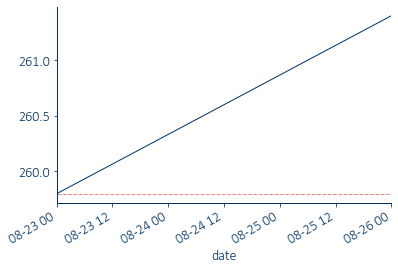

In [7]:
s = provider.get_ticker_feature(data_stocks, 'ADS.DE', 'close', dates)
s.plot()
plt.hlines(s[0], xmin=s.index[0], xmax=s.index[-1], colors='red', linestyles='dashed', alpha=.5)

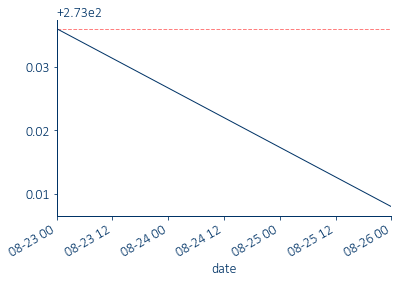

In [8]:
s = provider.get_ticker_feature(data_stocks, 'ADS.DE', 'close', dates, provider.tf_ma(cfg.train.window_trading_days[-1]))
s.plot()
plt.hlines(s[0], xmin=s.index[0], xmax=s.index[-1], colors='red', linestyles='dashed', alpha=.5)

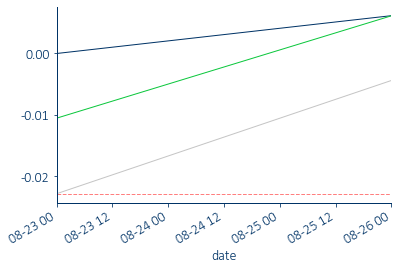

In [9]:
s = provider.get_ticker_feature(data_stocks, 'ADS.DE', 'close', dates, provider.tf_rel) - 1
s.plot()
s = provider.get_ticker_feature(data_stocks, 'ADS.DE', 'close', dates, provider.tf_loglag(cfg.train.lag_trading_days[0]))
s.plot()
s = provider.get_ticker_feature(data_stocks, 'ADS.DE', 'close', dates, provider.tf_loglag(cfg.train.lag_trading_days[1]))
s.plot()
plt.hlines(s[0], xmin=s.index[0], xmax=s.index[-1], colors='red', linestyles='dashed', alpha=.5)

In [10]:
features = set()
for k in cfg_stocks.data.keys():
    features |= set(cfg_stocks.data[k].keys())
for k in cfg_benchmarks.data.keys():
    features |= set(cfg_benchmarks.data[k].keys())
features = sorted(list(features))
features

['balancesheet',
 'calendar',
 'calls',
 'cashflow',
 'earnings',
 'financials',
 'history',
 'info',
 'puts',
 'recommendations',
 'sustainability']

In [11]:
stats_stocks = pd.DataFrame.from_dict(cfg_stocks.data, orient='index', columns=features)
stats_stocks['type'] = 'stock'
stats_benchmarks = pd.DataFrame.from_dict(cfg_benchmarks.data, orient='index', columns=features)
stats_benchmarks['type'] = 'benchmark'
df_stats = pd.concat([stats_stocks, stats_benchmarks])
df_stats.to_csv(f'{cfg.prepare.cache_dir}/metrics.csv')

In [12]:
df_stats

,balancesheet,calendar,calls,cashflow,earnings,financials,history,info,puts,recommendations,sustainability,type
1COV.DE,"(4, 28)","(1, 6)",NaN,"(4, 20)","(4, 2)","(4, 22)","(1085, 7)",117,NaN,NaN,"(1, 28)",stock
ADS.DE,"(4, 27)","(1, 6)",NaN,"(4, 19)","(4, 2)","(4, 22)","(5512, 7)",118,NaN,"(2, 4)","(1, 28)",stock
ALV.DE,"(4, 27)","(1, 6)",NaN,"(4, 2)","(4, 2)","(4, 22)","(5873, 7)",117,NaN,NaN,"(1, 28)",stock
BAS.DE,"(4, 27)","(1, 6)",NaN,"(4, 20)","(0, 6)","(4, 22)","(5880, 7)",117,NaN,NaN,"(1, 28)",stock
BAYN.DE,"(4, 28)","(1, 6)",NaN,"(4, 18)","(4, 2)","(4, 22)","(5883, 7)",116,NaN,NaN,"(1, 28)",stock
...,...,...,...,...,...,...,...,...,...,...,...,...
^STOXX50E,"(6, 0)",NaN,NaN,"(6, 0)","(0, 6)","(6, 0)","(8398, 7)",61,NaN,NaN,NaN,benchmark
^TA125.TA,"(6, 0)",NaN,NaN,"(6, 0)","(0, 6)","(6, 0)","(5551, 7)",61,NaN,NaN,NaN,benchmark
^TWII,"(6, 0)",NaN,NaN,"(6, 0)","(0, 6)","(6, 0)","(5544, 7)",61,NaN,NaN,NaN,benchmark
^VIX,"(6, 0)",NaN,"(38, 13)","(6, 0)","(0, 6)","(6, 0)","(7570, 7)",61,"(38, 13)",NaN,NaN,benchmark
